# Importando bibliotecas

In [1]:
# biblotecas para manipulação de dados
import pandas as pd
import numpy as np

#Bibliotecas auxiliares
import os
from functools import reduce
import re

#Biblioteca propria
import sys
sys.path.append("../src/")
from eda.eda import describe
from io_pyarrow.io_pyarrow import pyarrow_read_csv,write_table_from_pandas #leitura e escrita de arquivos csv grandes

%matplotlib inline
%reload_ext watermark
%watermark --iversions

pandas: 1.2.2
numpy : 1.20.1
sys   : 3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
re    : 2.2.1



___

# Importando arquivos

In [2]:
#Definindo path dos arquivos
path_data = "../data/raw/"

## SEADE
fonte: https://www.seade.gov.br/coronavirus/

In [3]:
plano_sp_leitos_internacoes = pyarrow_read_csv(path_data+"SEADE/plano_sp_leitos_internacoes_serie_nova.csv",sep=";")

### Dicionario

| Variável | Descrição |
| --- | --- |
| datahora          | Data no formato YYYY-MM-DD |
| nome_drs       | DRS ou região da Grande São Paulo |
| pacientes_uti_mm7d               | Média móvel para 7 dias do Pacientes Internados em Leitos de UTI Destinados para COVID-19 no dia |
| total_covid_uti_mm7d               |  Média móvel para 7 dias do Total de Leitos de UTI Destinados para COVID-19 no dia|
| ocupacao_leitos          | Ocupação de leitos de UTI destinados para COVID-19 (pacientes_uti_mm7d / total_covid_uti_mm7d) |
| pop             |População da DRS ou região da Grande São Paulo (Fonte: SEADE)  |
| leitos_pc       | Leitos Covid-19 UTI por 100 mil habitantes (total_covid_uti_mm7d / pop) |
| internacoes_28d          |Número de novas internações (UTI e Enfermaria) de pacientes confirmados ou com suspeita de COVID-19 nos últimos 28 dias|
| internacoes_28d_l        |Número de novas internações (UTI e Enfermaria) de pacientes confirmados ou com suspeita de COVID-19 nos 28 dias anteriores|
| internacoes_28v28            |Variação no número de novas internações ((internacoes_28d - internacoes_28d_l) / internacoes_28d_l) |
| pacientes_uti_ultimo_dia      | Pacientes Internados em Leitos de UTI Destinados para COVID-19 no último dia |
| total_covid_uti_ultimos_dia         | Total de Leitos de UTI Destinados para COVID-19 no último dia |
| ocupacao_leitos_ultimos_dia       | Ocupação de leitos de UTI destinados para COVID-19 no último dia (pacientes_uti / total_covid_uti) |
| internacoes_ultimo_dia        | Número de novas internações (UTI e Enfermaria) de pacientes confirmados ou com suspeita de COVID-19 no último dia |
| pacientes_enf_mm7d           | Média móvel para 7 dias do Pacientes Internados em Leitos de Enfermaria Destinados para COVID-19 no dia |
| total_covid_enf_mm7d            | Média móvel para 7 dias do Total de Leitos de Enfermaria Destinados para COVID-19 no dia |
| pacientes_enf_ultimo_dia          | Pacientes Internados em Leitos de Enfermaria Destinados para COVID-19 no último dia |
| total_covid_enf_ultimos_dia           | Total de Leitos de Enfermaria Destinados para COVID-19 no último dia |


fonte: https://github.com/seade-R/dados-covid-sp

___

# Analisando as bases de dados

In [4]:
describe(plano_sp_leitos_internacoes)

Quantidade de linhas: 3636


variable    type  na na_pct  unique     min    quat25  \
0                     datahora  object   0   0.0%     202       -         -   
1                     nome_drs  object   0   0.0%      18       -         -   
2           pacientes_uti_mm7d  object   0   0.0%    2212       -         -   
3         total_covid_uti_mm7d  object   0   0.0%    2193       -         -   
4              ocupacao_leitos  object   0   0.0%    2787       -         -   
5                          pop   int64   0   0.0%      18  278754  764041.0   
6                    leitos_pc  object   0   0.0%    1556       -         -   
7              internacoes_28d   int64   0   0.0%    2278     120    623.75   
8            internacoes_28d_l   int64   0   0.0%    2158     120     594.0   
9            internacoes_28v28  object   0   0.0%    3119       -         -   
10    pacientes_uti_ultimo_dia   int64   0   0.0%     965       2      68.0   
11  total_covid_uti_ultimo_dia   int64   0   0.0%    1010      39     121.0   
12  ocupacao_leitos_ultimo_dia  object   0   0.0%    2523       -         -   
13      internacoes_ultimo_dia   int64   0   0.0%     571       0      23.0   
14          pacientes_enf_mm7d  object   0   0.0%    2481       -         -   
15        total_covid_enf_mm7d  object   0   0.0%    2609       -         -   
16    pacientes_enf_ultimo_dia   int64   0   0.0%    1084       6      95.0   
17  total_covid_enf_ultimo_dia   int64   0   0.0%    1276      39     315.0   

       median            mean     quat75       max              std skewness  \
0           -               -          -         -                -        -   
1           -               -          -         -                -        -   
2           -               -          -         -                -        -   
3           -               -          -         -                -        -   
4           -               -          -         -                -        -   
5   1508565.0  4959988.777778  2461760.0  44639899  10668033.257821     3.02   
6           -               -          -         -                -        -   
7      1240.5     5144.666667    2378.75     86516     12330.245071     3.84   
8      1080.0     4458.783828    2020.75     82014     10299.713284     3.49   
9           -               -          -         -                -        -   
10      146.5      728.168317      313.0     13119      1857.351786     4.07   
11      225.0     1053.918592      423.0     14453      2441.884795     3.25   
12          -               -          -         -                -        -   
13       46.0      192.323982       90.0      3598       463.702975     3.89   
14          -               -          -         -                -        -   
15          -               -          -         -                -        -   
16      209.0      922.658966      420.0     18382      2334.133804     4.23   
17      484.0     1724.570407      781.0     22642      3812.415998     3.27   

   kurtosis media_desvio  
0         -            -  
1         -            -  
2         -            -  
3         -            -  
4         -            -  
5      7.96         0.46  
6         -            -  
7     16.43         0.42  
8     13.28         0.43  
9         -            -  
10    18.32         0.39  
11    10.53         0.43  
12        -            -  
13    16.96         0.41  
14        -            -  
15        -            -  
16    20.62          0.4  
17    10.35         0.45

In [5]:
plano_sp_leitos_internacoes.head()

datahora                 nome_drs pacientes_uti_mm7d  \
0  2020-10-08  DRS 01 Grande São Paulo            2036,86   
1  2020-10-08         DRS 02 Araçatuba              58,71   
2  2020-10-08        DRS 03 Araraquara              45,14   
3  2020-10-08  DRS 04 Baixada Santista             108,14   
4  2020-10-08          DRS 05 Barretos              55,57   

  total_covid_uti_mm7d ocupacao_leitos       pop leitos_pc  internacoes_28d  \
0              4829,86           42,17  21138247     22,85            16935   
1               118,57           49,52    764041     15,52              452   
2               123,29           36,61    991435     12,44              934   
3               409,14           26,43   1831884     22,33              797   
4                91,86           60,49    425090     21,61              615   

   internacoes_28d_l internacoes_28v28  pacientes_uti_ultimo_dia  \
0              21846            -22,48                      2011   
1                416              8,65                        59   
2               1014             -7,89                        49   
3               1067            -25,30                       110   
4                541             13,68                        58   

   total_covid_uti_ultimo_dia ocupacao_leitos_ultimo_dia  \
0                        4798                      41,91   
1                         120                      49,17   
2                         123                      39,84   
3                         412                      26,70   
4                          91                      63,74   

   internacoes_ultimo_dia pacientes_enf_mm7d total_covid_enf_mm7d  \
0                     658            2533,86              7104,86   
1                      22              94,71               302,43   
2                      39             125,86               388,86   
3                      31             165,00               690,29   
4                      27              54,43               243,14   

   pacientes_enf_ultimo_dia  total_covid_enf_ultimo_dia  
0                      2555                        7010  
1                        99                         302  
2                       141                         408  
3                       180                         691  
4                        49                         248

In [6]:
leitos = plano_sp_leitos_internacoes.copy()

## datahora

In [7]:
#Todos os casos de datahora puderam ser convertidos. Vamos então transformar a coluna
pd.to_datetime(leitos.datahora).isna().sum()

0

In [8]:
leitos.datahora = pd.to_datetime(leitos.datahora)

## nome_drs

In [9]:
#Vamos remover esses DRS XX e ainda aquele que possui o Estado de São Paulo
leitos.nome_drs.value_counts(dropna=False)

DRS 04 Baixada Santista         202
DRS 10 Piracicaba               202
DRS 11 Presidente Prudente      202
DRS 16 Sorocaba                 202
DRS 05 Barretos                 202
DRS 02 Araçatuba                202
DRS 01 Grande São Paulo         202
DRS 14 São João da Boa Vista    202
DRS 03 Araraquara               202
DRS 06 Bauru                    202
DRS 17 Taubaté                  202
DRS 12 Registro                 202
DRS 08 Franca                   202
DRS 13 Ribeirão Preto           202
DRS 07 Campinas                 202
DRS 15 São José do Rio Preto    202
Estado de São Paulo             202
DRS 09 Marília                  202
Name: nome_drs, dtype: int64

In [10]:
leitos = leitos.query("nome_drs != 'Estado de São Paulo'")

In [11]:
leitos.nome_drs = leitos.nome_drs.apply(lambda x: re.sub("^(DRS )(\d{2} )","",x))

## pacientes_uti_mm7d

In [12]:
def converte_string_float(series):
    return series.str.replace(",",".").astype(float)

In [13]:
#Média móvel para 7 dias do Pacientes Internados em Leitos de UTI Destinados para COVID-19 no dia
leitos.pacientes_uti_mm7d

0        2036,86
1          58,71
2          45,14
3         108,14
4          55,57
          ...   
3630      363,29
3631      133,86
3632      521,29
3633      380,86
3634      512,14
Name: pacientes_uti_mm7d, Length: 3434, dtype: object

In [14]:
converte_string_float(leitos.pacientes_uti_mm7d)

0       2036.86
1         58.71
2         45.14
3        108.14
4         55.57
         ...   
3630     363.29
3631     133.86
3632     521.29
3633     380.86
3634     512.14
Name: pacientes_uti_mm7d, Length: 3434, dtype: float64

In [15]:
leitos.pacientes_uti_mm7d = converte_string_float(leitos.pacientes_uti_mm7d)

## total_covid_uti_mm7d

In [16]:
#Média móvel para 7 dias do Total de Leitos de UTI Destinados para COVID-19 no dia
leitos.total_covid_uti_mm7d

0        4829,86
1         118,57
2         123,29
3         409,14
4          91,86
          ...   
3630      409,57
3631      152,86
3632      601,71
3633      439,29
3634      630,00
Name: total_covid_uti_mm7d, Length: 3434, dtype: object

In [17]:
converte_string_float(leitos.total_covid_uti_mm7d)

0       4829.86
1        118.57
2        123.29
3        409.14
4         91.86
         ...   
3630     409.57
3631     152.86
3632     601.71
3633     439.29
3634     630.00
Name: total_covid_uti_mm7d, Length: 3434, dtype: float64

In [18]:
leitos.total_covid_uti_mm7d = converte_string_float(leitos.total_covid_uti_mm7d)

## ocupacao_leitos

In [19]:
#Ocupação de leitos de UTI destinados para COVID-19 (pacientes_uti_mm7d / total_covid_uti_mm7d)
leitos.ocupacao_leitos

0       42,17
1       49,52
2       36,61
3       26,43
4       60,49
        ...  
3630    88,70
3631    87,57
3632    86,63
3633    86,70
3634    81,29
Name: ocupacao_leitos, Length: 3434, dtype: object

In [20]:
converte_string_float(leitos.ocupacao_leitos)

0       42.17
1       49.52
2       36.61
3       26.43
4       60.49
        ...  
3630    88.70
3631    87.57
3632    86.63
3633    86.70
3634    81.29
Name: ocupacao_leitos, Length: 3434, dtype: float64

In [21]:
leitos.ocupacao_leitos = converte_string_float(leitos.ocupacao_leitos)

## pop

<AxesSubplot:>

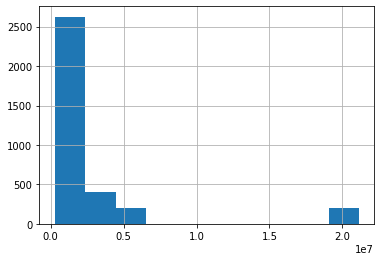

In [24]:
leitos["pop"].hist()

In [26]:
#A maior quantidade de pessoas está concentrada na grande São Paulo
leitos[leitos["pop"] > 1.5e7].nome_drs.value_counts()

Grande São Paulo    202
Name: nome_drs, dtype: int64

## leitos_pc

In [27]:
leitos.leitos_pc

0       22,85
1       15,52
2       12,44
3       22,33
4       21,61
        ...  
3630    27,72
3631    18,88
3632    38,32
3633    17,84
3634    25,30
Name: leitos_pc, Length: 3434, dtype: object

In [28]:
converte_string_float(leitos.leitos_pc)

0       22.85
1       15.52
2       12.44
3       22.33
4       21.61
        ...  
3630    27.72
3631    18.88
3632    38.32
3633    17.84
3634    25.30
Name: leitos_pc, Length: 3434, dtype: float64

In [29]:
leitos.leitos_pc = converte_string_float(leitos.leitos_pc)

## internacoes_28d

<AxesSubplot:>

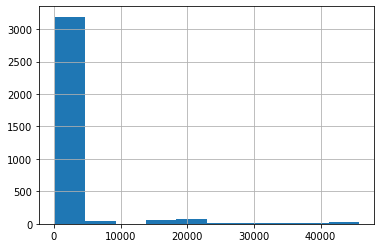

In [31]:
#Número de novas internações (UTI e Enfermaria) de pacientes confirmados ou com suspeita de COVID-19 nos últimos 28 dias
leitos.internacoes_28d.hist()

## internacoes_28d_l

<AxesSubplot:>

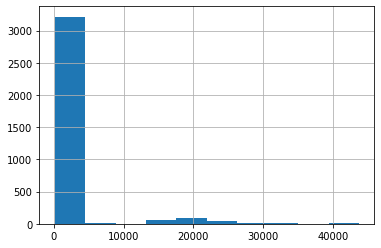

In [32]:
# Número de novas internações (UTI e Enfermaria) de pacientes confirmados ou com suspeita de COVID-19 nos 28 dias anteriores
leitos.internacoes_28d_l.hist()

## pacientes_uti_ultimo_dia

<AxesSubplot:>

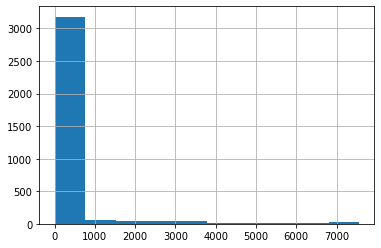

In [35]:
#Pacientes Internados em Leitos de Enfermaria Destinados para COVID-19 no último dia
leitos.pacientes_uti_ultimo_dia.hist()

## total_covid_uti_ultimo_dia

<AxesSubplot:>

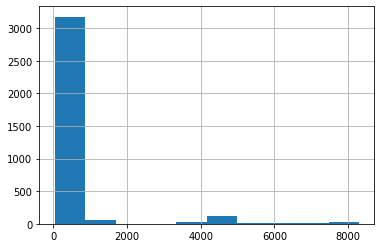

In [36]:
leitos.total_covid_uti_ultimo_dia.hist()

## ocupacao_leitos_ultimo_dia

In [39]:
leitos.ocupacao_leitos_ultimo_dia

0        41,91
1        49,17
2        39,84
3        26,70
4        63,74
         ...  
3630     89,86
3631     84,56
3632     86,05
3633     87,44
3634     81,53
Name: ocupacao_leitos_ultimo_dia, Length: 3434, dtype: object

In [40]:
converte_string_float(leitos.ocupacao_leitos_ultimo_dia)

0       41.91
1       49.17
2       39.84
3       26.70
4       63.74
        ...  
3630    89.86
3631    84.56
3632    86.05
3633    87.44
3634    81.53
Name: ocupacao_leitos_ultimo_dia, Length: 3434, dtype: float64

In [41]:
leitos.ocupacao_leitos_ultimo_dia=converte_string_float(leitos.ocupacao_leitos_ultimo_dia)

## internacoes_ultimo_dia

<AxesSubplot:>

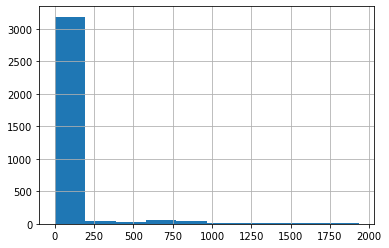

In [43]:
leitos.internacoes_ultimo_dia.hist()

## pacientes_enf_mm7d

In [44]:
leitos.pacientes_enf_mm7d

0        2533,86
1          94,71
2         125,86
3         165,00
4          54,43
          ...   
3630      416,57
3631      317,29
3632      483,14
3633      506,86
3634      607,86
Name: pacientes_enf_mm7d, Length: 3434, dtype: object

In [45]:
converte_string_float(leitos.pacientes_enf_mm7d)

0       2533.86
1         94.71
2        125.86
3        165.00
4         54.43
         ...   
3630     416.57
3631     317.29
3632     483.14
3633     506.86
3634     607.86
Name: pacientes_enf_mm7d, Length: 3434, dtype: float64

In [46]:
leitos.pacientes_enf_mm7d=converte_string_float(leitos.pacientes_enf_mm7d)

## total_covid_enf_mm7d

In [47]:
leitos.total_covid_enf_mm7d

0        7104,86
1         302,43
2         388,86
3         690,29
4         243,14
          ...   
3630      567,43
3631      540,86
3632      900,00
3633      790,86
3634     1075,86
Name: total_covid_enf_mm7d, Length: 3434, dtype: object

In [48]:
converte_string_float(leitos.total_covid_enf_mm7d)

0       7104.86
1        302.43
2        388.86
3        690.29
4        243.14
         ...   
3630     567.43
3631     540.86
3632     900.00
3633     790.86
3634    1075.86
Name: total_covid_enf_mm7d, Length: 3434, dtype: float64

In [49]:
leitos.total_covid_enf_mm7d=converte_string_float(leitos.total_covid_enf_mm7d)

## pacientes_enf_ultimo_dia

<AxesSubplot:>

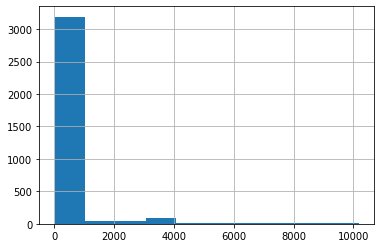

In [51]:
leitos.pacientes_enf_ultimo_dia.hist()

## total_covid_enf_ultimo_dia

<AxesSubplot:>

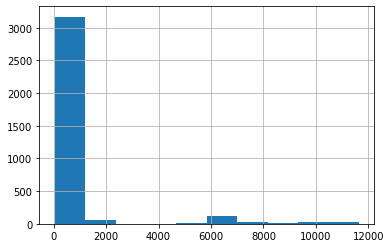

In [53]:
leitos.total_covid_enf_ultimo_dia.hist()

# Salvando os dados

In [55]:
write_table_from_pandas(leitos,"../data/interim/plano_sp_leitos_internacoes.parquet")